### Driver data clustering
1) Read the dataset<br>
2) Remove handle null values if any<br>
3) Depict 'Distance_Feature' and 'Speeding_Feature' on a scatter chart.<br> 
4) Based on 'Distance_Feature' and 'Speeding_Feature' cluster the dataset using KMeans<br>
5) Apply K_Means separately with 2,3,4 and 5 clusters. Depict different clusters on a scatter chart with their respective cluster centriods marked.<br>
6) Scale the data using Standard Scaler<br>
7) Determine appropriate number of cluster using Elbow method after data has been scaled<br>
8) Repeat Q5 with appropriate number of cluster obtained from Elbow method after scaling<br>


In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/driverdata.csv')

In [4]:
df

,Driver_ID,Distance_Feature,Speeding_Feature
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25
...,...,...,...
3995,3423310685,160.04,10
3996,3423312600,176.17,5
3997,3423312921,170.91,12
3998,3423313630,176.14,5


In [5]:
df.isnull().sum()

Driver_ID           0
Distance_Feature    0
Speeding_Feature    0
dtype: int64

Data visualization

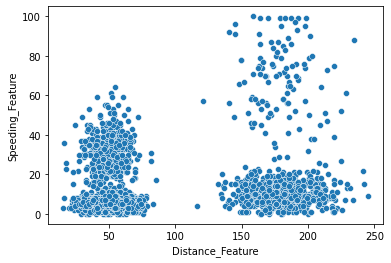

In [8]:
sns.scatterplot(x=df['Distance_Feature'],y=df['Speeding_Feature'])
plt.show()

In [96]:
x = df.iloc[:,[1,2]]

In [97]:
x

,Distance_Feature,Speeding_Feature
0,71.24,28
1,52.53,25
2,64.54,27
3,55.69,22
4,54.58,25
...,...,...
3995,160.04,10
3996,176.17,5
3997,170.91,12
3998,176.14,5


In [13]:
from sklearn.cluster import KMeans

In [47]:
km2 = KMeans(n_clusters=2)
y_pred2 = km2.fit_predict(x)
df['cluster2'] = y_pred2

In [48]:
km3 = KMeans(n_clusters=3)
y_pred3 = km3.fit_predict(x)
df['cluster3'] = y_pred3

In [49]:
km4 = KMeans(n_clusters=4)
y_pred4 = km4.fit_predict(x)
df['cluster4'] = y_pred4

In [50]:
km5 = KMeans(n_clusters=5)
y_pred5 = km5.fit_predict(x)
df['cluster5'] = y_pred5

In [52]:
print('cen2')
cen2 = km2.cluster_centers_
print(cen2)
print('cen3')
cen3 = km3.cluster_centers_
print(cen3)
print('cen4')
cen4 = km4.cluster_centers_
print(cen4)
print('cen5')
cen5 = km5.cluster_centers_
print(cen5)

cen2
[[ 50.04763437   8.82875   ]
 [180.017075    18.29      ]]
cen3
[[ 50.04763437   8.82875   ]
 [180.34311782  10.52011494]
 [177.83509615  70.28846154]]
cen4
[[180.34311782  10.52011494]
 [ 49.98428468   5.21441441]
 [177.83509615  70.28846154]
 [ 50.46127059  32.42823529]]
cen5
[[ 50.61421836  33.06203474]
 [180.43486331  10.5294964 ]
 [ 58.17614449   5.28254649]
 [ 41.81516429   5.39071429]
 [177.83509615  70.28846154]]


clusters2


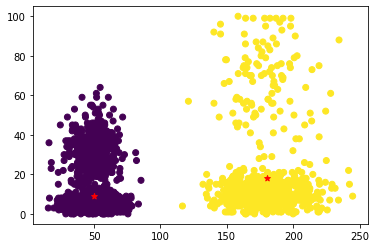

clusters3


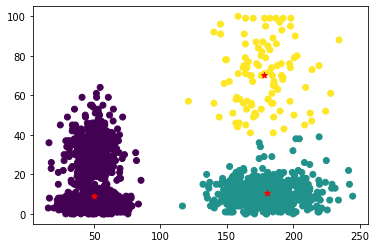

clusters4


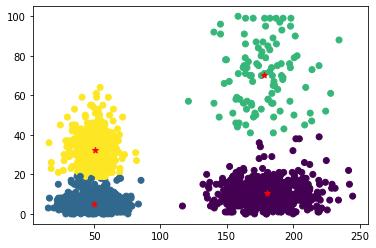

clusters5


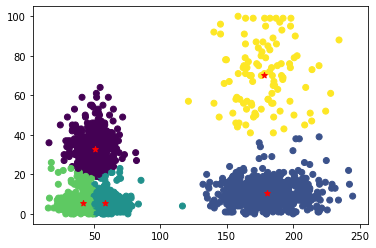

In [53]:
print('clusters2')
plt.scatter(x=df['Distance_Feature'],y=df['Speeding_Feature'],c=df['cluster2'])
plt.scatter(x=cen2[:,0],y=cen2[:,1],marker='*',color='red')
plt.show()
print('clusters3')
plt.scatter(x=df['Distance_Feature'],y=df['Speeding_Feature'],c=df['cluster3'])
plt.scatter(x=cen3[:,0],y=cen3[:,1],marker='*',color='red')
plt.show()
print('clusters4')
plt.scatter(x=df['Distance_Feature'],y=df['Speeding_Feature'],c=df['cluster4'])
plt.scatter(x=cen4[:,0],y=cen4[:,1],marker='*',color='red')
plt.show()
print('clusters5')
plt.scatter(x=df['Distance_Feature'],y=df['Speeding_Feature'],c=df['cluster5'])
plt.scatter(x=cen5[:,0],y=cen5[:,1],marker='*',color='red')
plt.show()

In [31]:
xs = x.copy()

#By using Minmax SCALE

In [123]:
from sklearn.preprocessing import minmax_scale

In [77]:
xs = minmax_scale(xs)

In [78]:
xs

array([[0.24303223, 0.28      ],
       [0.16142539, 0.25      ],
       [0.21380905, 0.27      ],
       ...,
       [0.67775985, 0.12      ],
       [0.70057138, 0.05      ],
       [0.66519824, 0.09      ]])

In [79]:
clus = []
for i in range(1,8):
  kms = KMeans(n_clusters=i)
  kms.fit(xs)
  clus.append(kms.inertia_)

In [80]:
print(x)
print(clus)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
[292.6563442304928, 81.24817490831506, 48.91142091013727, 21.627961552686823, 18.134445407822696, 15.072392952626885, 12.865882990496418]


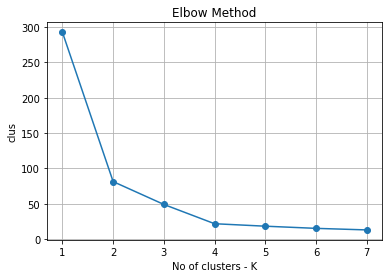

In [81]:
# plt.plot(x,y=clus)
# plt.show()
plt.plot(range(1,8),clus,marker='o')
plt.title('Elbow Method')
plt.xlabel('No of clusters - K')
plt.ylabel('clus')
plt.grid()
plt.show()

therefore using ELBOW method no.3 is calculated as cluster

In [111]:
kmsc1 = KMeans(n_clusters=3)
y_preds = kmsc1.fit_predict(xs)
df1 = df.copy()
df1['scaled 3 clusters'] = y_preds

In [112]:
df1

,Driver_ID,Distance_Feature,Speeding_Feature,cluster2,cluster3,cluster4,cluster5,scaled 3 clusters
0,3423311935,71.24,28,0,0,3,0,0
1,3423313212,52.53,25,0,0,3,0,0
2,3423313724,64.54,27,0,0,3,0,0
3,3423311373,55.69,22,0,0,3,0,0
4,3423310999,54.58,25,0,0,3,0,0
...,...,...,...,...,...,...,...,...
3995,3423310685,160.04,10,1,1,0,1,1
3996,3423312600,176.17,5,1,1,0,1,1
3997,3423312921,170.91,12,1,1,0,1,1
3998,3423313630,176.14,5,1,1,0,1,1


In [86]:
cens = kmsc.cluster_centers_
cens

array([[0.15059194, 0.08811504],
       [0.71890399, 0.10520115],
       [0.70284526, 0.70228571]])

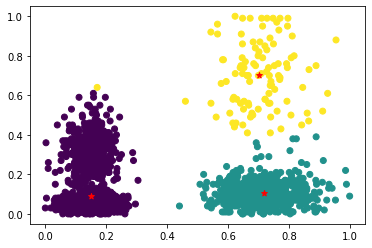

In [90]:
plt.scatter(x=xs[:,0],y=xs[:,1],c=df1['scaled 3 clusters'])
plt.scatter(x=cens[:,0],y=cens[:,1],marker='*',color='red')
plt.show()

#By using Standard Scaler

In [93]:
from sklearn.preprocessing import StandardScaler

In [94]:
sc = StandardScaler()

In [98]:
Xs = sc.fit_transform(x)

In [99]:
Xs

array([[-0.0898104 ,  1.26061251],
       [-0.43977285,  1.04174351],
       [-0.215131  ,  1.18765617],
       ...,
       [ 1.77447381,  0.09331115],
       [ 1.87229869, -0.41738319],
       [ 1.72060465, -0.12555785]])

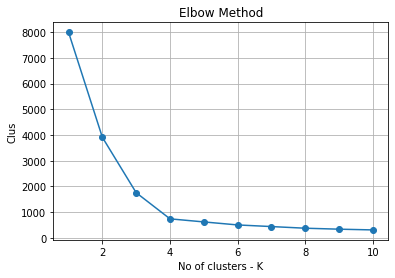

In [101]:
Clus = []
for i in range(1,11):
  kmsS = KMeans(n_clusters=i)
  kmsS.fit(Xs)
  Clus.append(kmsS.inertia_)
plt.plot(range(1,11),Clus,marker='o')
plt.title('Elbow Method')
plt.xlabel('No of clusters - K')
plt.ylabel('Clus')
plt.grid()
plt.show()

By elbow method 4 cluster numbers predicted

In [118]:
KmscS = KMeans(n_clusters=4)
y_predS = KmscS.fit_predict(Xs)
df2 = df.copy()
df2['scaled 4 clusters'] = y_predS

In [119]:
df2

,Driver_ID,Distance_Feature,Speeding_Feature,cluster2,cluster3,cluster4,cluster5,scaled 4 clusters
0,3423311935,71.24,28,0,0,3,0,3
1,3423313212,52.53,25,0,0,3,0,3
2,3423313724,64.54,27,0,0,3,0,3
3,3423311373,55.69,22,0,0,3,0,3
4,3423310999,54.58,25,0,0,3,0,3
...,...,...,...,...,...,...,...,...
3995,3423310685,160.04,10,1,1,0,1,2
3996,3423312600,176.17,5,1,1,0,1,2
3997,3423312921,170.91,12,1,1,0,1,2
3998,3423313630,176.14,5,1,1,0,1,2


In [120]:
cenS = KmscS.cluster_centers_
cenS

array([[-0.48678423, -0.40249736],
       [ 1.90400473,  4.34582367],
       [ 1.95263225, -0.0139714 ],
       [-0.47952334,  1.57909169]])

In [121]:
Xs

array([[-0.0898104 ,  1.26061251],
       [-0.43977285,  1.04174351],
       [-0.215131  ,  1.18765617],
       ...,
       [ 1.77447381,  0.09331115],
       [ 1.87229869, -0.41738319],
       [ 1.72060465, -0.12555785]])

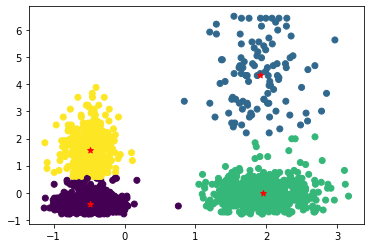

In [122]:
plt.scatter(x=Xs[:,0],y=Xs[:,1],c=df2['scaled 4 clusters'])
plt.scatter(x=cenS[:,0],y=cenS[:,1],marker='*',color='red')
plt.show()